# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!conda install -c pyviz hvplot geoviews -y
!pip install census
!pip install citipy

Channels:
 - pyviz
 - defaults
 - anaconda
 - conda-forge
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


____________________________________________________________________________________________________________________________________________________

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
import requests

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define your API key (make sure to replace 'YOUR_API_KEY' with your actual key)
weather_api_key = "be319bebe043d436169b92486c31af2c"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the request and get the JSON response
        city_weather = requests.get(city_url).json()
        
        # If the city is not found, the API returns a 'cod' of 404
        if city_weather['cod'] == 200:
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max'] - 273.15  # Kelvin to Celsius
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']

            # Append the City information into city_data list
            city_data.append({
                "City": city, 
                "Lat": city_lat, 
                "Lng": city_lng, 
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })
        else:
            print(f"City not found: {city}")

    except Exception as e:
        print(f"Error occurred for city: {city}, Error: {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | badr hunayn
Processing Record 5 of Set 1 | sidney
Processing Record 6 of Set 1 | greenville
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | kirakira
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | port saint john's
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | hobyo
Processing Record 15 of Set 1 | hassi messaoud
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | rechka-vydrino
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | lihue
Processing Record 20 of Set 1 | luis gil perez
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | tazovsky
Processing 

In [5]:
# res = requests.get(city_url).json()
# res
# city_url

In [6]:
# res['dt']

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,3.06,87,20,2.06,CL,1723675105
1,papatowai,-46.5619,169.4708,13.24,60,100,6.19,NZ,1723675105
2,port alfred,-33.5906,26.8910,11.77,62,41,4.02,ZA,1723675105
3,badr hunayn,23.7829,38.7905,32.75,59,28,2.40,SA,1723675105
4,sidney,-33.8679,151.2073,15.73,94,75,5.66,AU,1723675089


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,3.06,87,20,2.06,CL,1723675105
1,papatowai,-46.5619,169.4708,13.24,60,100,6.19,NZ,1723675105
2,port alfred,-33.5906,26.8910,11.77,62,41,4.02,ZA,1723675105
3,badr hunayn,23.7829,38.7905,32.75,59,28,2.40,SA,1723675105
4,sidney,-33.8679,151.2073,15.73,94,75,5.66,AU,1723675089


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [12]:
# Convert 'Date' column to ISO date format  (YYYY-MM-dd)
city_data_df
# city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d')
city_data_df['Date'] = pd.to_datetime(city_data_df['Date']).dt.strftime('%Y-%m-%d')

city_data_df.head()
# Find the minimum and maximum dates
min_date = city_data_df['Date'].min()
max_date = city_data_df['Date'].max()

# Print the range of dates
# print("Date Range:", min_date, "to", max_date)
timeDate = max_date
# timeDate

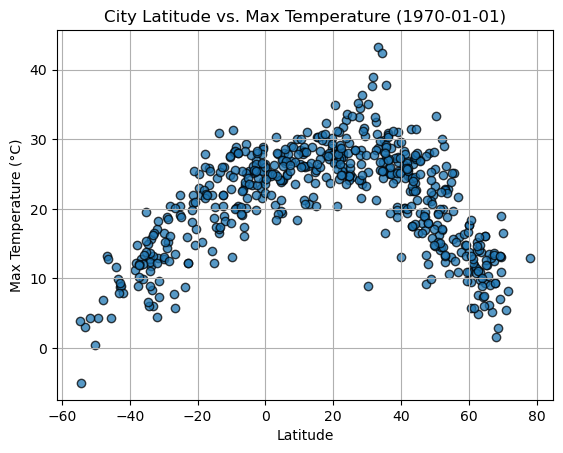

In [13]:
# Scatter plot for latitude vs. temperature

# Filter the data for the specific date (timeDate)
specific_date_data = city_data_df[city_data_df['Date'] == timeDate]

plt.scatter(specific_date_data['Lat'], specific_date_data['Max Temp'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ({timeDate})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Max Temperatur-Fig1.png")

# Show plot
plt.show()

#### Observation: The scatter plot of Temperature (°C) vs. Latitude plot shown above illustrated temperature peaks at approximately 20-degrees latitude. The latitude values below that latitude show a possible positive linear relationship with temperature, and those above latitude 20 degrees suggest a negative linear relationship with temperature.

#### Latitude Vs. Humidity

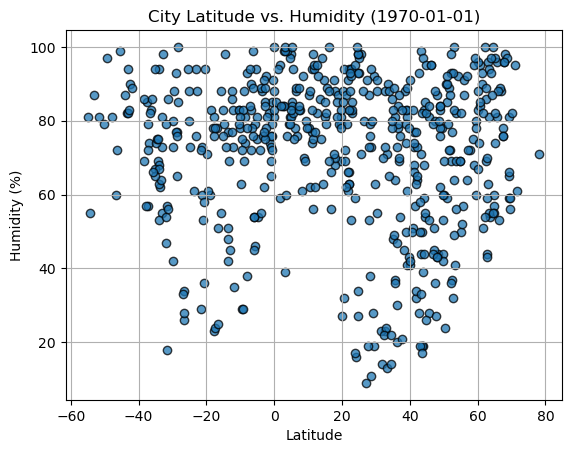

In [14]:
# Scatter plot for latitude vs. temperature

# Filter the data for the specific date 
specific_date_data = city_data_df[city_data_df['Date'] == timeDate]

plt.scatter(specific_date_data['Lat'], specific_date_data['Humidity'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({timeDate})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Humidity - Fig2.png")

# Show plot
plt.show()

#### Observation: The Humidity vs. Latitude scatter plot above with data from all cities suggests a relatively spread-out distribution of data points. There seems to be no relationship between humidity and latitude but the humidity percentages seem to largely cluster above 50%.

#### Latitude Vs. Cloudiness

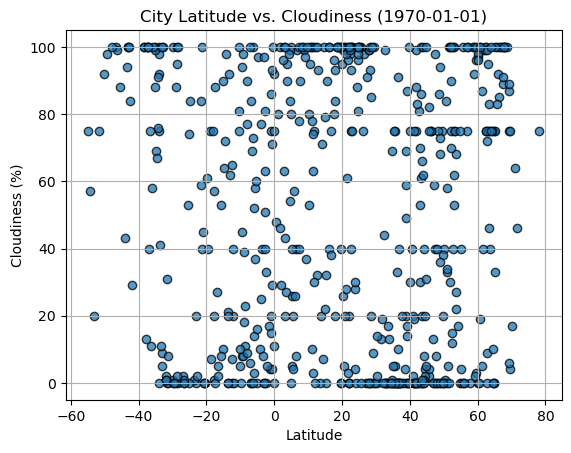

In [15]:
# Scatter plot for latitude vs. cloudiness

# Filter the data for the specific date (2024-04-11)
specific_date_data = city_data_df[city_data_df['Date'] == timeDate]

plt.scatter(specific_date_data['Lat'], specific_date_data['Cloudiness'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({timeDate})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Cloudiness - Fig3.png")

# Show plot
plt.show()


#### Observation: The scatter plot on Cloudiness vs. Latitude above, is from data of all the cities. It seems to suggest no relationship between cloudiness and city latitude. Whereas some cloudiness values point to clustering 0, 20, 40, 75, 90, and 100, these values may be rounded or categorized from some of the sources, and thus may not represent continuous variables or measurements.

#### Latitude vs. Wind Speed Plot

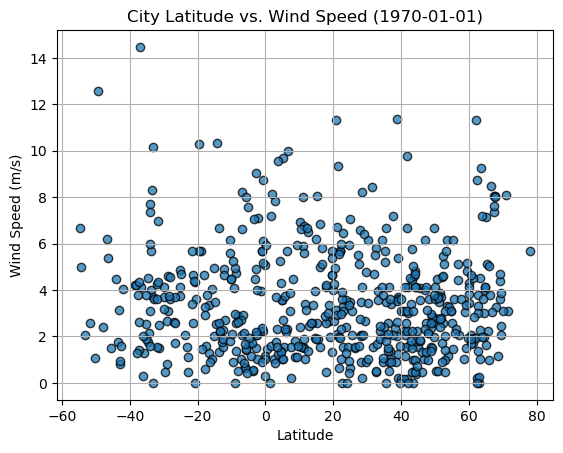

In [16]:
# Build the scatter plots for latitude vs. wind speed

# Filter the data for the specific date (2024-04-11)
specific_date_data = city_data_df[city_data_df['Date'] == timeDate]

# Scatter plot for latitude vs. wind speed
plt.scatter(specific_date_data['Lat'], specific_date_data['Wind Speed'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({timeDate})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Wind Speed - Fig4.png")

# Show plot
plt.show()


#### Observation: The scatter plot on City Wind speed vs. Latitude, seems not to show any relationship between wind speed and latitude but clustering. Most of the wind speed values are below about 6 mps.

---

## Requirement 2: Compute Linear Regression for Each Relationship


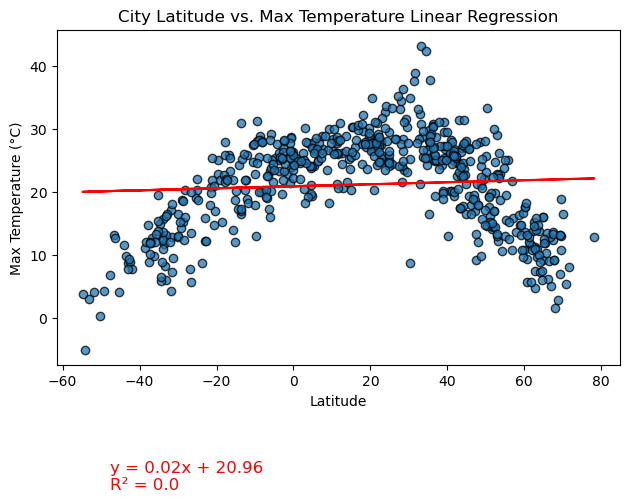

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, xlabel, ylabel, title, file_name=None):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors='black', alpha=0.75)

    # Plot regression line
    plt.plot(x_values, regress_values, color='red')

    # Annotate the linear regression equation and correlation coefficient on the plot
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}\nR² = {round(rvalue**2, 2)}'
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=12, 
                 color='red', xytext=(20, -320), textcoords='offset points')

    x_values = x_values.dropna()
    y_values = y_values.dropna()


    # Set plot labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Adjust layout
    plt.tight_layout()

    # Save the figure if file_name is provided
    if file_name:
        plt.savefig(file_name)

    # Show plot
    plt.show()

# Example call to test the function:
 #linear_regression_plot(city_data_df['Lat'], city_data_df['Max Temp'], 'Latitude', 'Max Temperature (°C)', 'City Latitude vs. Max Temperature Linear Regression', 'output_data/lat_vs_max_temp_regression.png')
# Ensure the directory exists
import os
if not os.path.exists('output_data'):
    os.makedirs('output_data')

# Call the linear_regression_plot function
linear_regression_plot(city_data_df['Lat'], city_data_df['Max Temp'], 
                       'Latitude', 'Max Temperature (°C)', 
                       'City Latitude vs. Max Temperature Linear Regression', 
                       'output_data/lat_vs_max_temp_regression.png')


In [31]:
# Create DataFrame for Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,badr hunayn,23.7829,38.7905,32.75,59,28,2.40,SA,1970-01-01
5,greenville,35.6127,-77.3663,27.30,64,75,0.00,US,1970-01-01
6,wailua homesteads,22.0669,-159.3780,28.44,66,0,5.66,US,1970-01-01
8,albany,42.6001,-73.9662,22.55,93,81,1.65,US,1970-01-01
10,anadyr,64.7500,177.4833,9.28,57,0,4.00,RU,1970-01-01


In [32]:
# Create DataFrame for Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,3.06,87,20,2.06,CL,1970-01-01
1,papatowai,-46.5619,169.4708,13.24,60,100,6.19,NZ,1970-01-01
2,port alfred,-33.5906,26.8910,11.77,62,41,4.02,ZA,1970-01-01
4,sidney,-33.8679,151.2073,15.73,94,75,5.66,AU,1970-01-01
7,kirakira,-10.4544,161.9205,27.46,83,81,5.60,SB,1970-01-01


###  Temperature vs. Latitude Linear Regression Plot

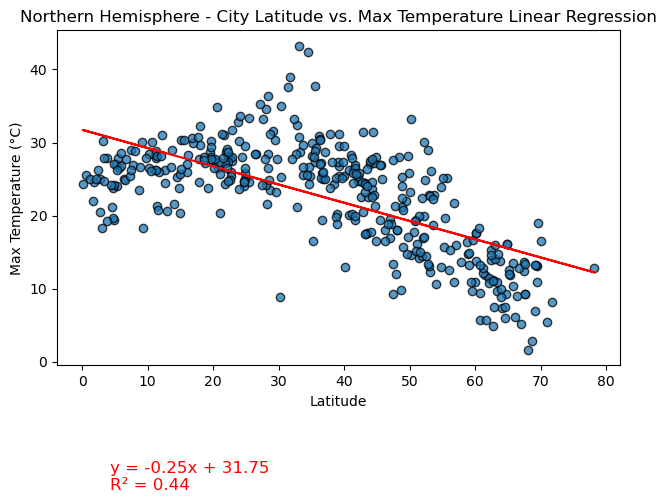

In [33]:
# Linear regression on Northern Hemisphere

# Linear regression on Northern Hemisphere for latitude vs. maximum temperature
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (°C)', 
                       'Northern Hemisphere - City Latitude vs. Max Temperature Linear Regression', 
                       'output_data/northern_hemi_lat_vs_max_temp_regression.png')


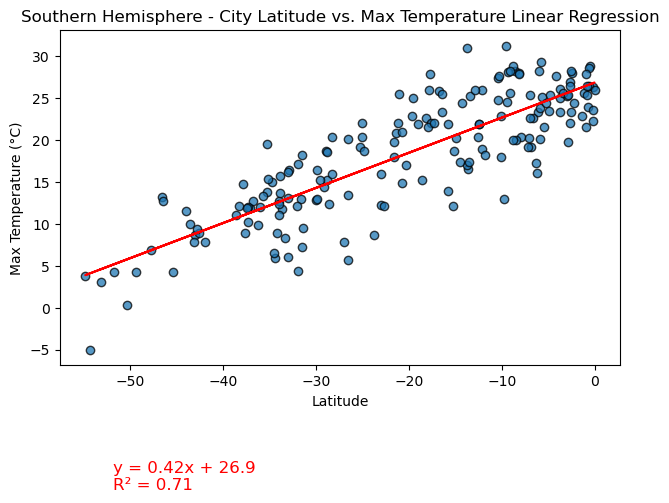

In [34]:
# Linear regression on Southern Hemisphere

# Linear regression on Southern Hemisphere for latitude vs. maximum temperature
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (°C)', 
                       'Southern Hemisphere - City Latitude vs. Max Temperature Linear Regression', 
                       'output_data/southern_hemi_lat_vs_max_temp_regression.png')

#### Observation: There is a strong negative correlation (R^2 = 78%) between Max Temperature and Latitude in the Northern hemisphere. The higher the latitude (further from the equator) the cooler it becomes. Conversely, in the Southern hemisphere, there is a moderately positive correlation (R^2 = 56%), here, an increase in latitude (towards the equator) is associated with a moderate increase in temperature.

### Humidity vs. Latitude Linear Regression Plot

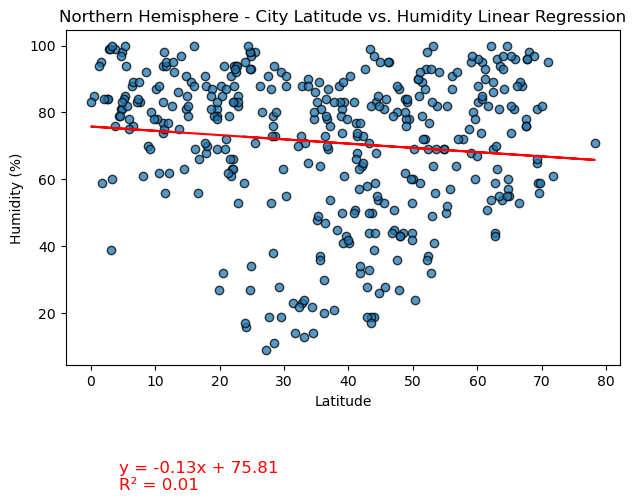

In [35]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere for latitude vs. humidity
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 
                       'Humidity (%)', 'Northern Hemisphere - City Latitude vs. Humidity Linear Regression', 
                       'output_data/northern_hemi_lat_vs_humidity_regression.png')

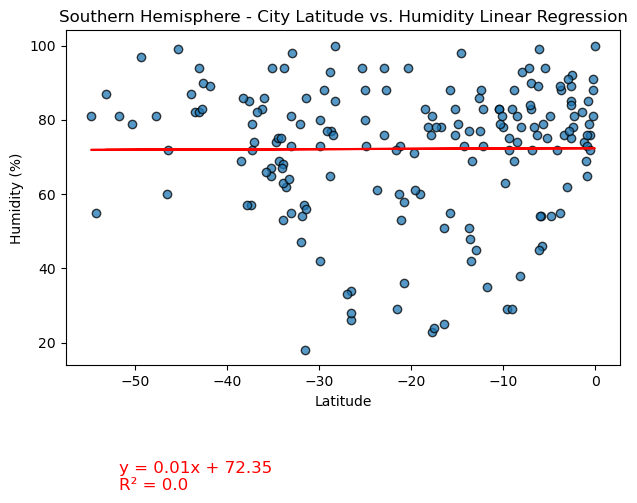

In [36]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere for latitude vs. humidity
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 
                       'Humidity (%)', 'Southern Hemisphere - City Latitude vs. Humidity Linear Regression', 
                       'output_data/southern_hemi_lat_vs_humidity_regression.png')

#### Observation: The correlation coefficent between latitude and humidity in the Northern hemisphere is less than 10% suggesting no relationship between the two, and this was also the finding for cities in the Southern hemisphere. An increase in humidity is not associated with an increase in latitude in the cities. Hence, there is no apparent difference in humidity as you tend towards or away from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

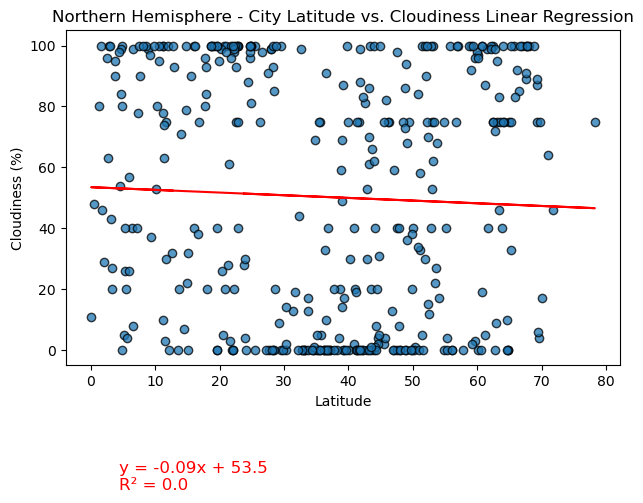

In [37]:
# Northern Hemisphere

# Linear regression on Northern Hemisphere for latitude vs. cloudiness
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 
                       'Cloudiness (%)', 'Northern Hemisphere - City Latitude vs. Cloudiness Linear Regression', 
                       'output_data/northern_hemi_lat_vs_cloudiness_regression.png')

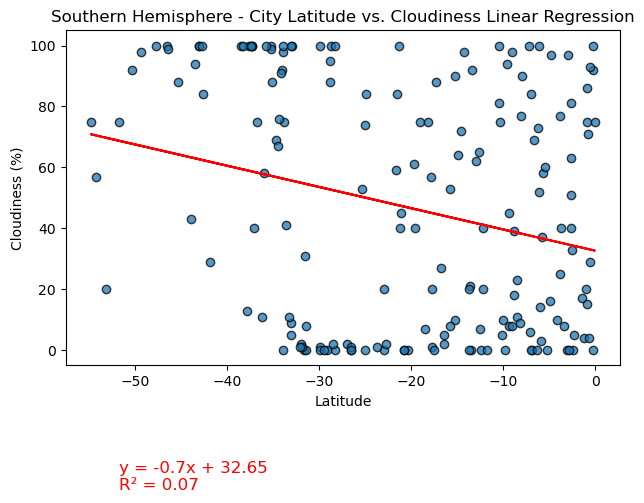

In [38]:
# Southern Hemisphere

# Linear regression on Northern Hemisphere for latitude vs. cloudiness
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 
                       'Cloudiness (%)', 'Southern Hemisphere - City Latitude vs. Cloudiness Linear Regression', 
                       'output_data/southern_hemi_lat_vs_cloudiness_regression.png')

#### Observation: There is no relationship between the latitude of a city in either the Northern or Southern Hemisphere and Cloudiness considering the  r= 1% and r = 3% correlation coefficients,respectively. Thus, lack of difference in cloudiness as you tend towards or away from the equator.

### Wind Speed vs. Latitude Linear Regression Plot

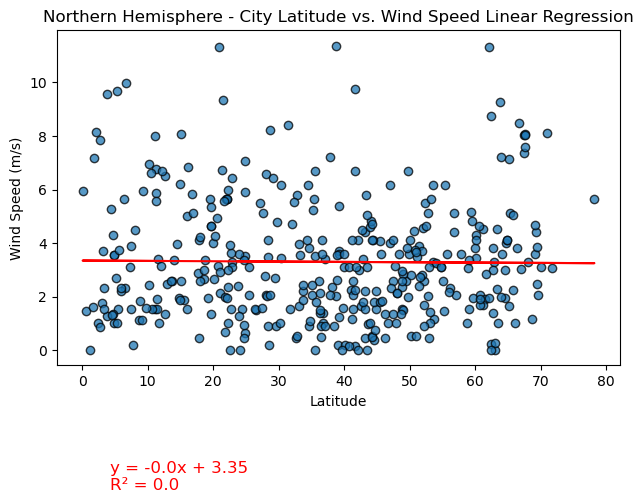

In [39]:
# Nothern Hemisphere

# Linear regression on Northern Hemisphere for latitude vs. wind speed
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', 
                       'Northern Hemisphere - City Latitude vs. Wind Speed Linear Regression', 
                       'output_data/northern_hemi_lat_vs_wind_speed_regression.png')

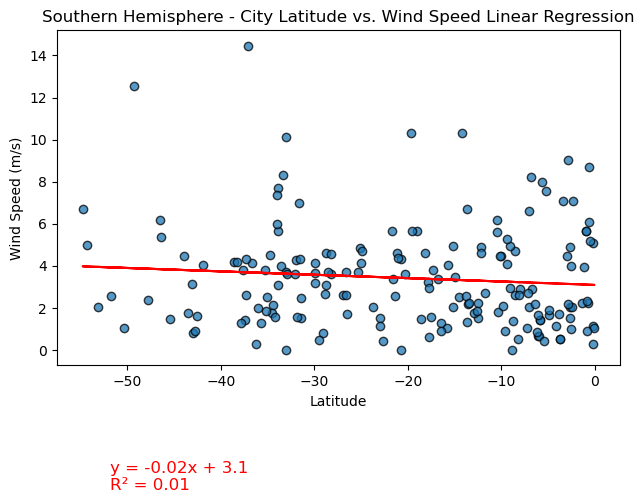

In [40]:
# Southern Hemisphere

# Linear regression on Northern Hemisphere for latitude vs. wind speed
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', 
                       'Southern Hemisphere - City Latitude vs. Wind Speed Linear Regression', 
                       'output_data/southern_hemi_lat_vs_wind_speed_regression.png')

#### Observation: There is no relationship between the change in latitude in a city in the Northern Hemisphere and wind speed looking at r = 1%. A very weak negative relationship may exist between latitude and wind speed for cities in the Southern Hemisphere, r=5%. The speed of wind very weakly reduces in the Southern hemisphere as you tend towards the equator.